In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
srcx = torch.linspace(-1,1,100)
x = torch.unsqueeze(srcx,dim=1) # torch只处理二维数据，所以要把数据升维

y = x.pow(2) + 0.2 * torch.rand(x.size())
srcx.shape,x.shape,y.shape

(torch.Size([100]), torch.Size([100, 1]), torch.Size([100, 1]))

In [3]:
## 把x,y 变成 Variable 因为神经网络只能输入Variable
x,y = Variable(x),Variable(y)

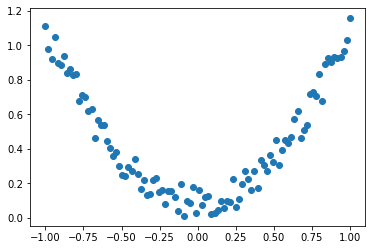

In [4]:
plt.scatter(x,y)

In [5]:
class RegressionNeuralNetwork(torch.nn.Module): # torch.nn.Module net的主模块
    def __init__(self,n_features,n_hidden,n_output):
        '''
        n_features 数据个数
        n_hidden 隐藏层的神经元的个数
        n_output
        '''
        super(RegressionNeuralNetwork,self).__init__() #要继承模块的信息
        self.hidden = torch.nn.Linear(n_features,n_hidden) # 隐藏层，输入的内容是他有多少哥输入和输出
        self.predict = torch.nn.Linear(n_hidden,n_output) # 输出预测层，输入的内容是

    def forward(self,x):
        '''前向传播'''
        x = F.relu(self.hidden(x)) #过一遍hidden传入上面定义的线性神经网络处理的函数中
        x = self.predict(x)
        return x

In [6]:
net = RegressionNeuralNetwork(1,10,1)

In [7]:
'''
optimizer 设置优化器
lr是学习率 这里设置为0.005
'''
optimizer = torch.optim.SGD(net.parameters(),lr=0.005)
'''
设置损失函数
MSELoss 平方误差和做回归的损失函数比较合适
'''
loss_func = torch.nn.MSELoss()
'''训练神经网络10000次'''
for t in range(10000):
    '''调用图神经网络预测，输入x'''
    prediction = net(x) 
    '''计算y值的误差,传入预测值和y的实际值'''
    loss = loss_func(prediction,y)
    '''梯度下降的终点设置为0'''
    optimizer.zero_grad() #
    '''设置反向传播'''
    loss.backward() #
    ''''''
    optimizer.step()

In [8]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.005
    momentum: 0
    nesterov: False
    weight_decay: 0
)

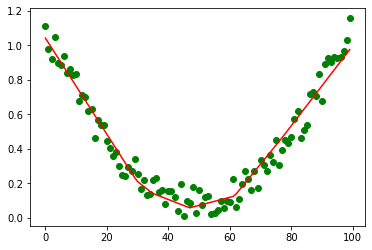

In [9]:
plt.plot(prediction.data.numpy(),c='r')
plt.scatter(range(y.shape[0]),y,c='g')